In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Read the csv from the web source
wine = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data",
                   sep=",",header=None)
wine.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [3]:
#Naming all the columns based on the source information
wine.columns=["Labels","Alcohol","Malic_acid","Ash","Alca_ash","Magnesium","phenols",
           "Flavanoids","Nonflav_phenols","Proanthocyanins",
           "Color_int","Hue","diluted_wines","Proline"]
print(wine.columns)
wine.head(2)

Index(['Labels', 'Alcohol', 'Malic_acid', 'Ash', 'Alca_ash', 'Magnesium',
       'phenols', 'Flavanoids', 'Nonflav_phenols', 'Proanthocyanins',
       'Color_int', 'Hue', 'diluted_wines', 'Proline'],
      dtype='object')


,Labels,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [4]:
#Assign Target labels to a new table
y=wine['Labels']
print("Target table size is",y.shape)
y.head(5)

Target table size is (178,)


0    1
1    1
2    1
3    1
4    1
Name: Labels, dtype: int64

In [5]:
X=wine.ix[:,1:]
print("Predictor variables size is ", X.shape)
X.head(5)

Predictor variables size is  (178, 13)


,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


##Problem 1-a

In [29]:
#Split the train set, test set, train class, test class
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                 y, #Class labels
                                                 stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,#Test size is set as 34% of entire set
                                                 random_state=2) # Set the randon state for spliting data  in same order

In [30]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(117, 13)
(61, 13)
(117,)
(61,)


In [21]:
#Import Desision Tree, Naive Bayes , K-Nearest Neighors
from sklearn import neighbors, tree, naive_bayes

In [31]:
#Set up Decision Tree classifier with ALL default setting
treeclf = tree.DecisionTreeClassifier(criterion = "gini", 
                                      random_state = 28,
                                      max_depth=3, 
                                      min_samples_leaf=2)
#Plug in the train dataset with target class
treeclf = treeclf.fit(x_train, y_train)
treeclf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [32]:
#Classify the Target Class
y_pre = treeclf.predict(x_test)
print (y_pre.shape)

(61,)


In [33]:
#The average Accuracy score across the train instances
print (treeclf.score(x_train, y_train)*100,"%")

100.0 %


In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pre)*100,"%")

93.4426229508 %


####Repeat 100 times on Holdout Partition and Decision Tree Model to calculate their Means, Variances, Confidence Interval

In [164]:
n_times=100 #Preset 35 times trial 
train_score_lst=[] #Preset the Train score list
test_score_lst=[] #Preset the Test score list

for i in range(1,n_times+1):

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=0.34,#Test size is set as 34% of entire set
                                                     random_state=i) # Set the randon state for spliting data  in same order

    #Set up Decision Tree classifier with the optimal setting from Assignment #1
    treeclf = tree.DecisionTreeClassifier(criterion = "gini", 
                                          random_state = 28,
                                          max_depth=3, 
                                          min_samples_leaf=2)
    #Plug in the train dataset with target class
    treeclf = treeclf.fit(x_train, y_train)
    #Predict y value on testing data
    y_pre = treeclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    train_score_lst.append(treeclf.score(x_train, y_train))
    test_score_lst.append(accuracy_score(y_test, y_pre))
    


In [230]:
x_test.shape

(61, 13)

####Calculate the Means of Training and Testing Data

In [165]:
train_score_lst_DT = train_score_lst
test_score_lst_DT = test_score_lst

train_mean=np.mean(np.array(train_score_lst))
test_mean=np.mean(np.array(test_score_lst))

print("Decision Tree Result:")
print("Mean of Accuracy of Training Data is ",round(train_mean*100,2),'%')
print("Mean of Accuracy of Testing Data is ",round(test_mean*100,2),'%')

Decision Tree Result:
Mean of Accuracy of Training Data is  97.89 %
Mean of Accuracy of Testing Data is  90.0 %


100

####Calculate the Variances of Training and Testing Data

In [166]:
train_var = np.var(np.array(train_score_lst))
test_var = np.var(np.array(test_score_lst))

print("Decision Tree Result:")
print("Variance of Accuracy of Training Data is ",train_var)
print("Variance of Accuracy of Testing Data is ",test_var)

Decision Tree Result:
Variance of Accuracy of Training Data is  0.000266571699905
Variance of Accuracy of Testing Data is  0.00204514915345


####Confidence Interval

In [167]:
#p,q, n values setting
p=train_mean
q=1-p
n=len(x_train)

print("Decision Tree Result:")

#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("95 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#90% C.I.
z=1.65
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("90 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#80%C.I.
z=1.28
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("80 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

Decision Tree Result:
95 Percent Confidence Interval of Training Data is (0.953,1.005)
90 Percent Confidence Interval of Training Data is (0.957,1.001)
80 Percent Confidence Interval of Training Data is (0.962,0.996)


In [168]:
#p,q, n values setting
p=test_mean
q=1-p
n=len(x_test)

print("Decision Tree Result:")

#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("95 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#90% C.I.
z=1.65
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("90 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#80%C.I.
z=1.28
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("80 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

Decision Tree Result:
95 Percent Confidence Interval of Testing Data is (0.825,0.975)
90 Percent Confidence Interval of Testing Data is (0.837,0.963)
80 Percent Confidence Interval of Testing Data is (0.851,0.949)


####Repeat 100 times on Holdout Partition and Naive Bayes Model to calculate their Means, Variances, Confidence Interval

In [169]:
n_times=100 #Preset 35 times trial 
train_score_lst=[] #Preset the Train score list
test_score_lst=[] #Preset the Test score list

for i in range(1,n_times+1):

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=0.34,#Test size is set as 34% of entire set
                                                     random_state=i) # Set the randon state for spliting data  in same order

   #Set up Naive Bayes classifier with ALL default setting
    nbclf = naive_bayes.GaussianNB()
    #Plug in the 66% of training set of data
    nbclf=nbclf.fit(x_train,y_train)
    #Predict y value on testing data
    y_pre = nbclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    train_score_lst.append(nbclf.score(x_train, y_train))
    test_score_lst.append(accuracy_score(y_test, y_pre))

####Calculate the Means of Training and Testing Data

In [170]:
train_score_lst_nb = train_score_lst
test_score_lst_nb = test_score_lst

train_mean=np.mean(np.array(train_score_lst))
test_mean=np.mean(np.array(test_score_lst))

print("Naive Bayes Classifer Result:")
print("Mean of Accuracy of Training Data is ",round(train_mean*100,2),'%')
print("Mean of Accuracy of Testing Data is ",round(test_mean*100,2),'%')

Naive Bayes Classifer Result:
Mean of Accuracy of Training Data is  98.43 %
Mean of Accuracy of Testing Data is  97.57 %


####Calculate the Variances of Training and Testing Data

In [171]:
train_var = np.var(np.array(train_score_lst))
test_var = np.var(np.array(test_score_lst))

print("Naive Bayes Classifer Result:")
print("Variance of Accuracy of Training Data is ",train_var)
print("Variance of Accuracy of Testing Data is ",test_var)

Naive Bayes Classifer Result:
Variance of Accuracy of Training Data is  7.1181240412e-05
Variance of Accuracy of Testing Data is  0.000249825315775


####Confidence Interval

In [172]:
#p,q, n values setting
p=train_mean
q=1-p
n=len(x_train)

print("Decision Tree Result:")

#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("95 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#90% C.I.
z=1.65
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("90 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#80%C.I.
z=1.28
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("80 Percent Confidence Interval of Training Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

Decision Tree Result:
95 Percent Confidence Interval of Training Data is (0.962,1.007)
90 Percent Confidence Interval of Training Data is (0.965,1.003)
80 Percent Confidence Interval of Training Data is (0.970,0.999)


In [173]:
#p,q, n values setting
p=test_mean
q=1-p
n=len(x_test)

print("Decision Tree Result:")

#95% C.I.
z=1.96
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("95 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#90% C.I.
z=1.65
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("90 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

#80%C.I.
z=1.28
ci_left, ci_right = (p)-(z*np.sqrt(p*q/n)), (p)+(z*np.sqrt(p*q/n))
print("80 Percent Confidence Interval of Testing Data is (%0.3f,%0.3f)"%(ci_left,ci_right))

Decision Tree Result:
95 Percent Confidence Interval of Testing Data is (0.937,1.014)
90 Percent Confidence Interval of Testing Data is (0.943,1.008)
80 Percent Confidence Interval of Testing Data is (0.951,1.001)


##Problem-1-b: Paired t-test

Paired t-test with the following Hypothesis:

P0 (Null): Mean Accuracy of TWO Models are the SAME

Pa (Alternative): Mean Accuracy of TWO Models are different from each other

Based on the calculation below, we could summarize as the following:

Training Set: The t-statistics is -192.38 with df=99 (Degree of Freedom) which means that the corresponding p-value is greater 0.25. With assumed 95% Confidence Interval, we could NOT reject he P0 Null hypothesis, we should collect more data for further analysis

Testing Set: The t-statistics is -353.363645575 with df=99 (Degree of Freedom) which means that the corresponding p-value is greater 0.25. With assumed 95% Confidence Interval, we could NOT reject he P0 Null hypothesis, we should collect more data for further analysis.

In [246]:
#Calculate Difference of Score of Training Data of the Decision Tree and Naive Bayes Models
diff_score = list(map(lambda x,y: x-y, train_score_lst_DT,train_score_lst_nb))

#Transform the Score lists into DataFrame
df = pd.DataFrame(list(zip(train_score_lst_DT,train_score_lst_nb,diff_score)), 
                  columns=['DT_train_score','nb_train_score','Score_Difference'])
print("Table Size is ",df.shape)
df.head(5)

Table Size is  (100, 3)


,DT_train_score,nb_train_score,Score_Difference
0,0.991453,0.982906,0.008547
1,0.991453,0.965812,0.025641
2,0.974359,0.982906,-0.008547
3,0.957265,0.974359,-0.017094
4,1.000000,0.991453,0.008547


In [247]:
Score_mean = df['Score_Difference'].mean()
Score_var = df['Score_Difference'].var()
print("Mean of Score Difference is ",df['Score_Difference'].mean())
print("Variance of Score Difference is ",df['Score_Difference'].var())
print("Sample size of Training Set is ", df.shape[0])
print("Degree of Freedom is ", df.shape[0]-1)

#Calculate t statistic:
t_stat = Score_mean / (Score_var/np.sqrt(df.shape[0]))
print("Calculated t-Statistic is ", t_stat)

Mean of Score Difference is  -0.005384615384615371
Variance of Score Difference is  0.0002798899949897102
Sample size of Training Set is  100
Degree of Freedom is  99
Calculated t-Statistic is  -192.383274894


In [248]:
#Calculate Difference of Score of Testing Data of the Decision Tree and Naive Bayes Models
diff_score = list(map(lambda x,y: x-y, test_score_lst_DT,test_score_lst_nb))

#Transform the Score lists into DataFrame
df = pd.DataFrame(list(zip(test_score_lst_DT,test_score_lst_nb,diff_score)), 
                  columns=['DT_test_score','nb_test_score','Score_Difference'])
print("Table Size is ",df.shape)
df.head(5)

Table Size is  (100, 3)


,DT_test_score,nb_test_score,Score_Difference
0,0.950820,0.983607,-0.032787
1,0.934426,0.967213,-0.032787
2,0.852459,0.967213,-0.114754
3,0.885246,0.950820,-0.065574
4,0.918033,0.983607,-0.065574


In [249]:
Score_mean = df['Score_Difference'].mean()
Score_var = df['Score_Difference'].var()
print("Mean of Score Difference is ",df['Score_Difference'].mean())
print("Variance of Score Difference is ",df['Score_Difference'].var())
print("Sample size of Testing Set is ", df.shape[0])
print("Degree of Freedom is ", df.shape[0]-1)

#Calculate t statistic:
t_stat = Score_mean / (Score_var/np.sqrt(df.shape[0]))
print("Calculated t-Statistic is ", t_stat)

Mean of Score Difference is  -0.07573770491803276
Variance of Score Difference is  0.002143336075074855
Sample size of Testing Set is  100
Degree of Freedom is  99
Calculated t-Statistic is  -353.363645575


##Problem-2



In [11]:
#Import Desision Tree, Naive Bayes , K-Nearest Neighors
from sklearn import neighbors, tree, naive_bayes
from sklearn.metrics import accuracy_score

In [12]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
DT_train_score_lst=[] #Preset the Train score list
DT_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

    #Set up Decision Tree classifier with the optimal setting from Assignment #1
    treeclf = tree.DecisionTreeClassifier(criterion = "gini", 
                                          random_state = 28,
                                          max_depth=3, 
                                          min_samples_leaf=2)
    #Plug in the train dataset with target class
    treeclf = treeclf.fit(x_train, y_train)
    #Predict y value on testing data
    y_pre = treeclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    DT_train_score_lst.append(treeclf.score(x_train, y_train))
    DT_test_score_lst.append(accuracy_score(y_test, y_pre))
    



In [13]:
DT_train_score_lst

[0.95454545454545459,
 0.967741935483871,
 0.98750000000000004,
 0.98969072164948457,
 0.99130434782608701,
 0.99248120300751874,
 0.99337748344370858]

In [14]:
DT_test_score_lst

[0.79104477611940294,
 0.87068965517241381,
 0.9285714285714286,
 0.9135802469135802,
 0.95238095238095233,
 0.9555555555555556,
 0.92592592592592593]

In [15]:
train_size_lst = np.arange(0.25,0.86,0.1) #Preset Size of Training Data
nb_train_score_lst=[] #Preset the Train score list
nb_test_score_lst=[] #Preset the Test score list

for i in train_size_lst:

    #Split the train set, test set, train class, test class
    from sklearn.cross_validation import train_test_split
    x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                     y, #Class labels
                                                     stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                     test_size=1-i,#Iterating the size of Training data set
                                                     random_state=28) # Set the randon state for spliting data  in same order

   #Set up Naive Bayes classifier with ALL default setting
    nbclf = naive_bayes.GaussianNB()
    #Plug in the 66% of training set of data
    nbclf=nbclf.fit(x_train,y_train)
    #Predict y value on testing data
    y_pre = nbclf.predict(x_test)

    #Calculate the Accuracy Score of the Training and Testing Set
    nb_train_score_lst.append(nbclf.score(x_train, y_train))
    nb_test_score_lst.append(accuracy_score(y_test, y_pre))

In [16]:
nb_train_score_lst

[0.97727272727272729,
 0.9838709677419355,
 0.97499999999999998,
 0.97938144329896903,
 0.9826086956521739,
 0.98496240601503759,
 0.98675496688741726]

In [17]:
nb_test_score_lst

[0.9850746268656716,
 0.99137931034482762,
 0.98979591836734693,
 0.97530864197530864,
 0.98412698412698407,
 1.0,
 0.96296296296296291]

In [33]:
df2 = pd.DataFrame(list(zip(DT_train_score_lst, DT_test_score_lst,nb_train_score_lst,nb_test_score_lst)), 
             columns = ['DT_train_Acc','DT_test_Acc','nb_train_Acc','nb_test_Acc'],
            index = np.arange(0.25,0.86,0.1))
print("The size of Accuracy Table",df2.shape)
df2

The size of Accuracy Table (7, 4)


,DT_train_Acc,DT_test_Acc,nb_train_Acc,nb_test_Acc
0.25,0.954545,0.791045,0.977273,0.985075
0.35,0.967742,0.870690,0.983871,0.991379
0.45,0.987500,0.928571,0.975000,0.989796
0.55,0.989691,0.913580,0.979381,0.975309
0.65,0.991304,0.952381,0.982609,0.984127
0.75,0.992481,0.955556,0.984962,1.000000
0.85,0.993377,0.925926,0.986755,0.962963


In [81]:
df3=np.ones(df2.shape)
df3=pd.DataFrame(df3, index = np.arange(0.25,0.86,0.1) )
Err_df= pd.DataFrame(df3.values-df2.values, 
                     index= np.arange(0.25,0.86,0.1), 
                     columns = ['DT_Resubstition_Err',
                                'DT_Generalization_Err',
                                'nb_Resubstition_Err',
                                'nb_Generalization_Err'])
print(Err_df.shape)
Err_df

(7, 4)


,DT_Resubstition_Err,DT_Generalization_Err,nb_Resubstition_Err,nb_Generalization_Err
0.25,0.045455,0.208955,0.022727,0.014925
0.35,0.032258,0.129310,0.016129,0.008621
0.45,0.012500,0.071429,0.025000,0.010204
0.55,0.010309,0.086420,0.020619,0.024691
0.65,0.008696,0.047619,0.017391,0.015873
0.75,0.007519,0.044444,0.015038,0.000000
0.85,0.006623,0.074074,0.013245,0.037037


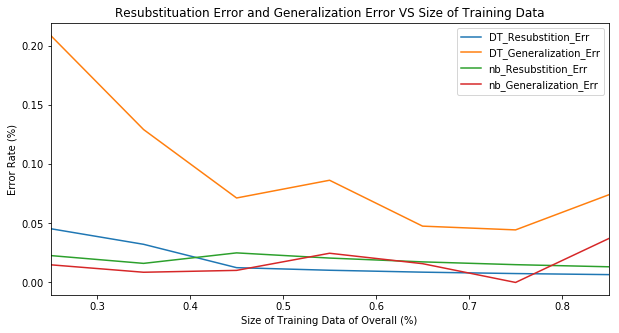

In [83]:
Err_df.plot(x=Err_df.index.values, figsize=(10,5))
plt.title("Resubstituation Error and Generalization Error VS Size of Training Data")
plt.xlabel("Size of Training Data of Overall (%)")
plt.ylabel("Error Rate (%)")
plt.show()

##Problem-2

Ans:

Based on the analysis below, we could observe that the Error Rate on the Training and Testing data are generally Higher when the size of Training data set is small. The Error Rates gradually decline when the size of Training data increases, especially happening in the training dataset (Blue: Decision Tree, Green: Naive Bayes). On the other hand, there is different on the testing data. The Generalization error (Error from Testing data) bounces back up when the size of Training data passes approximately 75%. The bounce-back incident is properably occured due to the over-fitting problem. When the size of Training set weight too much than the Testing data, the overfitting problem would be arised. Besides, we could also observe that the under-fitting problem occurs when the size of training data is too less. 

Also Based on the below, the Decision Tree model comes up a under-fitting appearance, The Generalization Error (from testing data) is 4-fold higher than the Resubstitution Error when the size of Training data is ONLY 25%. In this case, I believe that is normal because Decision Tree is sensitive to the size of Training and Testing data. The classification cases are built in the Tree, the accuracy of D.T. all depends on the number cases are built in the Tree, the more built-in cases, the more accurate result. On the contrary, the Naive Bayes model is built by the probabilities, so that it is NOT that sensitive to the size of Training data, so that we could see that the deficiency between the training and testing data is not too far. 

##Problem-3-a:

Transform Three Classes into Two Classes

In [92]:
#Check the number of each classes
y.value_counts()

2    71
1    59
3    48
Name: Labels, dtype: int64

In [105]:
wine2=wine
#Convert Class 2 and 3 into 0. However, we keep the Class 1
wine2[wine2.Labels==2]=0
wine2[wine2.Labels==3]=0

In [107]:
#Recheck the number of Class labels
y = wine2['Labels']
y.value_counts()

0    119
1     59
Name: Labels, dtype: int64

In [113]:
X=wine2.ix[:,1:]
print("The size of the predictor variables are ",X.shape)
X.head(3)

The size of the predictor variables are  (178, 13)


,Alcohol,Malic_acid,Ash,Alca_ash,Magnesium,phenols,Flavanoids,Nonflav_phenols,Proanthocyanins,Color_int,Hue,diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185


##Problem-3-b:

Ans:

Based on the Testing analysis (Plot 3a) below, I would first say that classification result is better than a Random model because the curve is above the Random line. I would choose the optimal probability threshold = 0.498731 with corresponding False Positive Rate = 0.294118 and True Positive Rate = 0.705882. The reason for choosing this threshold because the target on this point is very much perpendicular to the (0,1) point. Also, we could observe that this top-left point provides the largest gap =0.411765 (Plot 3b) between Tpr and Fpr before the gap size is decreasing. The is another sign for us to verify this is the optimal point.

Based on the Training analysis (Plot 3c) below, I would first say that classification result is better than a Random model because the curve is above the Random line. I would choose the optimal probability threshold = 0.37500 with corresponding False Positive Rate = 0.224370 and True Positive Rate = 0.794118. The reason for choosing this threshold because the target on this point is very much perpendicular to the (0,1) point. By comparing the testing and training data analysis resut, I would say that their performance are very similar which means they would not be any over-fitting problem occur in this case.


In [401]:
from sklearn.cross_validation import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X, #Predictor Variables
                                                 y, #Class labels
                                                 stratify=y, #data is split in a stratified fashion, using this as the class labels
                                                 test_size=0.34,#Size of Training data set is 34% of Overall
                                                 random_state=28) # Set the rand

nbclf = naive_bayes.GaussianNB()
nbclf.fit(x_train,y_train) #Plug in the 66% of training set of data
y_pre_test = nbclf.predict_proba(x_test)[:,1] #Predict the probability of being Class 1 (Positive Class) in testing set
y_pre_train = nbclf.predict_proba(x_train)[:,1] #Predict the probability of being Class 1 (Positive Class) in training set

         fpr       tpr  Threshold
0   0.000000  0.000000   1.999717
1   0.058824  0.000000   0.999717
2   0.058824  0.117647   0.997778
3   0.117647  0.117647   0.995412
4   0.117647  0.294118   0.913261
5   0.176471  0.294118   0.870814
6   0.176471  0.470588   0.805916
7   0.294118  0.470588   0.680243
8   0.294118  0.705882   0.498731
9   0.352941  0.705882   0.475511
10  0.352941  0.764706   0.459346
11  0.411765  0.764706   0.424770
12  0.411765  0.823529   0.400784
13  0.647059  0.823529   0.268372
14  0.647059  0.941176   0.261126
15  1.000000  0.941176   0.080825
16  1.000000  1.000000   0.080606


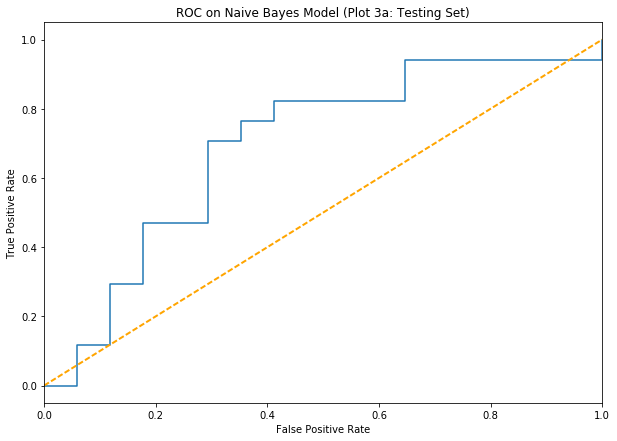

In [402]:
#Run the roc_curve function to find out False_positive, True_positive and Threshold with preset positive class =1
fpr, tpr, thre = metrics.roc_curve(y_test, y_pre_test,pos_label=1) #Run the ROC curve function with preset positive class =1


df4=pd.DataFrame(list(zip(fpr, tpr,thre)), columns=['fpr','tpr','Threshold'])
print(df4)
df4.plot(y="tpr", x="fpr", figsize=(10,7))
plt.plot([0, 1], [0, 1], color='orange',lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC on Naive Bayes Model (Plot 3a: Testing Set)")
plt.legend().remove()
plt.show()

    Def_True_False_pos  threshold
0             0.000000   1.999717
1            -0.058824   0.999717
2             0.058824   0.997778
3             0.000000   0.995412
4             0.176471   0.913261
5             0.117647   0.870814
6             0.294118   0.805916
7             0.176471   0.680243
8             0.411765   0.498731
9             0.352941   0.475511
10            0.411765   0.459346
11            0.352941   0.424770
12            0.411765   0.400784
13            0.176471   0.268372
14            0.294118   0.261126
15           -0.058824   0.080825
16            0.000000   0.080606


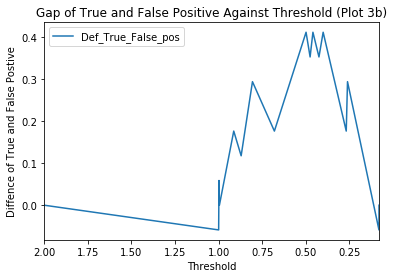

In [403]:
df5 = pd.DataFrame(list(zip(tpr-fpr, thre)), columns = ["Def_True_False_pos", "threshold"])
print(df5)
df5.plot(x="threshold",y="Def_True_False_pos")
plt.xlabel("Threshold")
plt.ylabel("Diffence of True and False Postive")
plt.title("Gap of True and False Positive Against Threshold (Plot 3b)")
plt.show()

        fpr       tpr  Threshold
0   0.00000  0.029412   1.000000
1   0.00000  0.382353   0.911437
2   0.06250  0.382353   0.880908
3   0.06250  0.470588   0.841165
4   0.09375  0.470588   0.830863
5   0.09375  0.500000   0.807987
6   0.12500  0.500000   0.789540
7   0.12500  0.647059   0.636423
8   0.15625  0.647059   0.517312
9   0.15625  0.676471   0.517125
10  0.21875  0.676471   0.506361
11  0.21875  0.705882   0.424317
12  0.25000  0.705882   0.414380
13  0.25000  0.764706   0.311193
14  0.31250  0.764706   0.303328
15  0.31250  0.794118   0.247178
16  0.37500  0.794118   0.224370
17  0.37500  0.823529   0.222154
18  0.40625  0.823529   0.216033
19  0.40625  0.941176   0.176121
20  0.53125  0.941176   0.161014
21  0.53125  0.970588   0.138746
22  0.56250  0.970588   0.135335
23  0.56250  1.000000   0.122140
24  1.00000  1.000000   0.028995


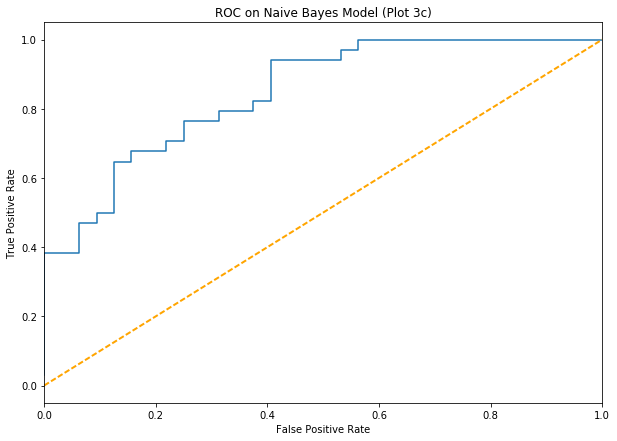

In [404]:
#Run the roc_curve function to find out False_positive, True_positive and Threshold with preset positive class =1
fpr, tpr, thre = metrics.roc_curve(y_train, y_pre_train,pos_label=1) 
#Put all the variables into the dataframe
df6=pd.DataFrame(list(zip(fpr, tpr,thre)), columns=['fpr','tpr','Threshold'])
print(df6)
df6.plot(y="tpr", x="fpr", figsize=(10,7))
plt.plot([0, 1], [0, 1], color='orange',lw=2, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC on Naive Bayes Model (Plot 3c)")
plt.legend().remove()
plt.show()


    Def_True_False_pos  threshold
0             0.029412   1.000000
1             0.382353   0.911437
2             0.319853   0.880908
3             0.408088   0.841165
4             0.376838   0.830863
5             0.406250   0.807987
6             0.375000   0.789540
7             0.522059   0.636423
8             0.490809   0.517312
9             0.520221   0.517125
10            0.457721   0.506361
11            0.487132   0.424317
12            0.455882   0.414380
13            0.514706   0.311193
14            0.452206   0.303328
15            0.481618   0.247178
16            0.419118   0.224370
17            0.448529   0.222154
18            0.417279   0.216033
19            0.534926   0.176121
20            0.409926   0.161014
21            0.439338   0.138746
22            0.408088   0.135335
23            0.437500   0.122140
24            0.000000   0.028995


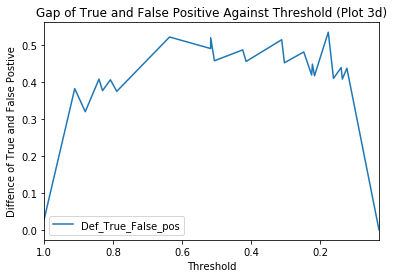

In [405]:
#Find the difference between the TRUE positive rate and False Positive Rate
df7 = pd.DataFrame(list(zip(tpr-fpr, thre)), columns = ["Def_True_False_pos", "threshold"])
print(df7)
df7.plot(x="threshold",y="Def_True_False_pos")
plt.xlabel("Threshold")
plt.ylabel("Diffence of True and False Postive")
plt.title("Gap of True and False Positive Against Threshold (Plot 3d)")
plt.show()

##Problem-3-c: Lift Curve

Ans:

Based on the analysis below, the minimum cost of data acquisition would be about 60.5% to get at least 80% Accuracy ( The proportion of the total number of predictions that were correct) on the Training. For the Testing data, the minimum cost of data acquisition would be about 63% to get at least 80% Accuracy

In [413]:
gain_df = pd.DataFrame(list(zip(y_pre_train,y_train)), columns=["Score", "Target"])
gain_df = gain_df.sort_values(by=["Score"], ascending=False)
print("Gain Chart size is ",gain_df.shape)
gain_df.head(3)

Gain Chart size is  (66, 2)


,Score,Target
36,1.0,1
29,1.0,1
37,1.0,1


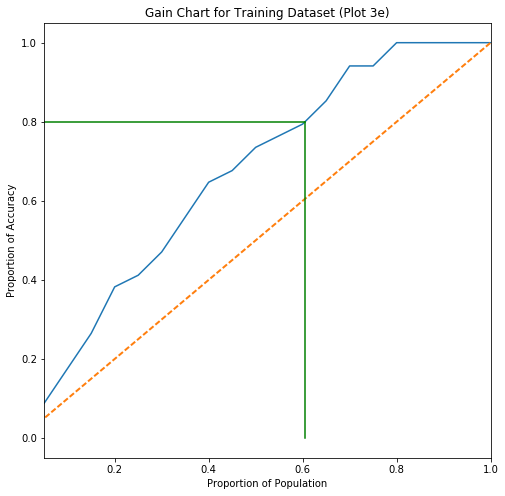

In [416]:
tot_pos = gain_df[gain_df['Target']==1].shape[0] #Total number of Positive Cases
sum1=0
gain_lst=[]

for i in np.arange(0.05,1.001,0.05):    
    records = int(gain_df.shape[0]*i)
    sum1 = sum(gain_df['Target'].iloc[0:records])
    gain_lst.append(sum1/tot_pos)

df8 = pd.DataFrame(gain_lst, columns=["Target"], index=np.arange(0.05,1.001,0.05))
df8.plot(y="Target", figsize=(8,8))
plt.plot((0,1),(0,1), lw=2, linestyle = "--")
plt.plot((0,0.605), (0.8,0.8), color="green")
plt.plot((0.605,0.605), (0,0.8), color="green")
plt.title("Gain Chart for Training Dataset (Plot 3e)")
plt.xlabel("Proportion of Population")
plt.ylabel("Proportion of Accuracy")
plt.legend().remove()
plt.show()

In [417]:
gain_df = pd.DataFrame(list(zip(y_pre_test,y_test)), columns=["Score", "Target"])
gain_df = gain_df.sort_values(by=["Score"], ascending=False)
print("Gain Chart size is ",gain_df.shape)
gain_df.head(3)

Gain Chart size is  (34, 2)


,Score,Target
25,0.999717,0
31,0.999463,1
16,0.997778,1


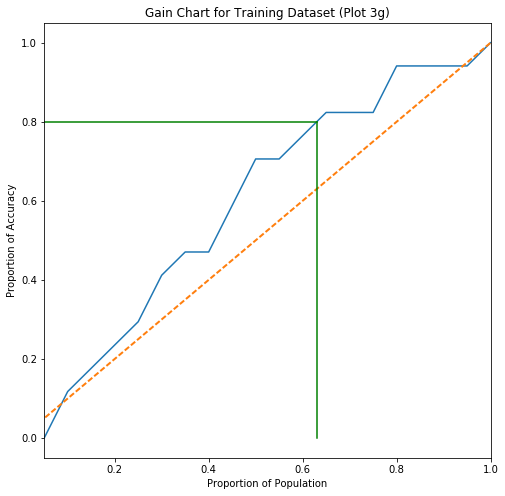

In [418]:
tot_pos = gain_df[gain_df['Target']==1].shape[0] #Total number of Positive Cases
sum1=0
gain_lst=[]

for i in np.arange(0.05,1.001,0.05):    
    records = int(gain_df.shape[0]*i)
    sum1 = sum(gain_df['Target'].iloc[0:records])
    gain_lst.append(sum1/tot_pos)

df9 = pd.DataFrame(gain_lst, columns=["Target"], index=np.arange(0.05,1.001,0.05))
df9.plot(y="Target", figsize=(8,8))
plt.plot((0,1),(0,1), lw=2, linestyle = "--")
plt.plot((0,0.63),(0.8,0.8),color="green")
plt.plot((0.63,0.63),(0,0.8),color="green")
plt.title("Gain Chart for Training Dataset (Plot 3g)")
plt.xlabel("Proportion of Population")
plt.ylabel("Proportion of Accuracy")
plt.legend().remove()
plt.show()